# Introducing `matplotlib`

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### The Basics



In [17]:
x = [1, 2, 4, 5]
y = [5, 2, 5, 8]

##### Markerstyle and Color

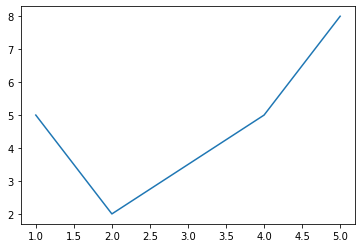

In [10]:
plt.plot(x, y)

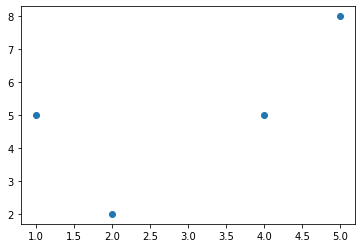

In [11]:
plt.plot(x, y, 'o')

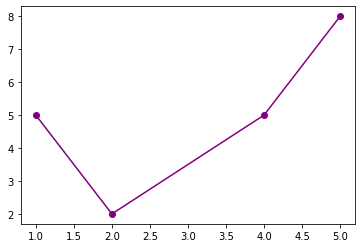

In [12]:
plt.plot(x, y, '-o', color = 'purple')

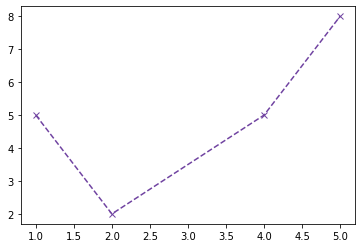

In [16]:
plt.plot(x, y, '--x', color = '#7043a1')

##### Adding Labels

Text(0.5, 1.0, 'A matplotlib plot')

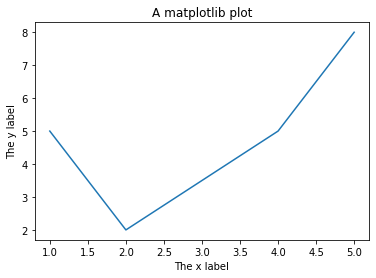

In [19]:
plt.plot(x, y)
plt.xlabel('The x label')
plt.ylabel('The y label')
plt.title('A matplotlib plot')

Text(0.5, 1.0, 'A matplotlib plot')

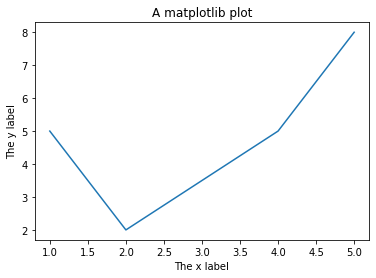

In [25]:
plt.plot(x, y)
plt.xlabel('The x label')
plt.ylabel('The y label')
plt.title('A matplotlib plot')


##### Controlling Fonts and Overriding Default Settings

In [26]:
from matplotlib.font_manager import FontProperties

In [27]:
font_0 = FontProperties()

In [28]:
font_0.get_family()

['sans-serif']

In [29]:
font_0.set_family('fantasy')

Text(0.0, 1.0, 'A matplotlib plot')

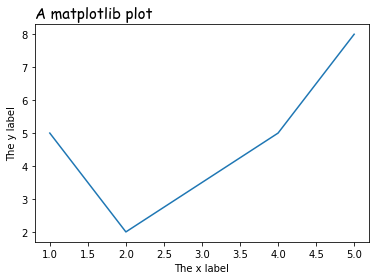

In [32]:
plt.plot(x, y)
plt.xlabel('The x label')
plt.ylabel('The y label')
plt.title('A matplotlib plot', fontproperties = font_0, fontsize = 15, loc = 'left')

##### Font Options 

<img src = 'data/im1.png' />

In [45]:
from matplotlib import rcParams
rcParams['font.family'] = 'monospace'
rcParams['font.sans-serif'] = ['Fixed']

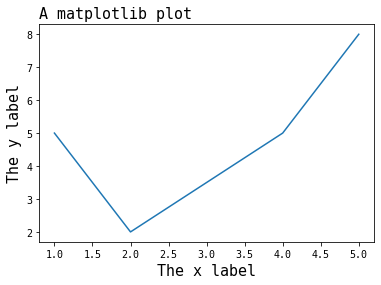

In [47]:
plt.plot(x, y)
plt.xlabel('The x label', fontsize = 15)
plt.ylabel('The y label', fontsize = 15)
plt.title('A matplotlib plot',fontsize = 15, loc = 'left');

##### Scatter Plots

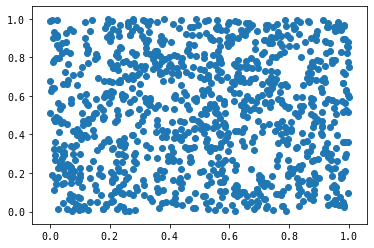

In [129]:
x = np.random.random(1000)
y = np.random.random(1000)
plt.scatter(x, y)

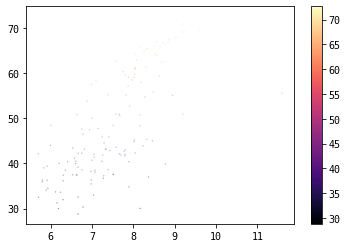

In [141]:
#color points based on y values and use magma colormap
plt.scatter(x, y, c = y, s = 1/y, cmap = 'magma')
plt.colorbar()

##### Using `Series` as Data

In [142]:
gapminder = pd.read_csv('data/gapminder_all.csv')

In [143]:
x = np.log(gapminder.gdpPercap_1952)
y = gapminder.lifeExp_1952

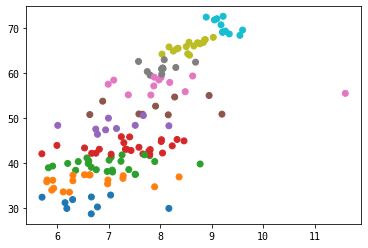

In [144]:
plt.scatter(x, y, c = y, cmap = 'tab10')

In [145]:
color_dict = {
    'Africa': 'green',
    'Asia': 'purple',
    'Europe': 'red',
    'Americas': 'blue',
    'Oceania': 'orange'}
    
    
def color_mapper(x):
    return color_dict[x]

In [146]:
gapminder.continent.apply(color_mapper)

0       green
1       green
2       green
3       green
4       green
        ...  
137       red
138       red
139       red
140    orange
141    orange
Name: continent, Length: 142, dtype: object

In [147]:
gapminder['colors'] = gapminder.continent.apply(color_mapper)

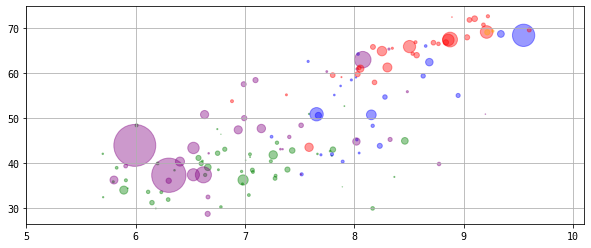

In [148]:
plt.figure(figsize = (10, 4))
plt.scatter(x, y, 
            c = gapminder['colors'], 
            s = gapminder['pop_1952']/10**5.5,
           alpha = 0.4)
plt.xlim(5.0, 10.1);
plt.grid()

In [217]:
happiness = pd.read_csv('data/2016.csv')

In [218]:
happiness.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


##### PROBLEMS

1. Is there a relationship between happiness and health?
2. Happiness and wealth?
3. Are there regional trends in the relationship between happiness and health?  
4. Below we read in the world happiness data from 2017.

In [219]:
h17 = pd.read_csv('data/2017.csv')

In [220]:
h17.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [221]:
happiness.shape

(157, 13)

In [222]:
h17.shape

(155, 12)

In [223]:
region_dict = {k:v for k,v in zip(happiness.Country, happiness.Region)}

def region_mapper(x):
    return region_dict[x]

h17.Country.apply(region_mapper)

KeyError: 'Taiwan Province of China'

In [ ]:
#exceptions can return unknown
def region_mapper(x):
    try:
        return region_dict[x]
    

In [242]:
#examine missing regions and name appropriately


In [225]:
h17.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Region
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Western Europe
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Western Europe
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Western Europe
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Western Europe
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Western Europe


In [226]:
h17.columns = [a.replace('.', ' ') for a in h17.columns]

In [228]:
happiness.columns = [a.replace(')', '').replace('(', '') for a in happiness.columns]

In [229]:
happiness.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy GDP per Capita,Family,Health Life Expectancy,Freedom,Trust Government Corruption,Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [230]:
happiness.rename({'Lower Confidence Interval': 'Whisker low',
                 'Upper Confidence Interval': 'Whisker high'}, axis = 1, inplace = True)

In [238]:
h17.rename({'Trust  Government Corruption ': 'Trust Government Corruption',
           'Economy  GDP per Capita ': 'Economy GDP per Capita',
           'Health  Life Expectancy ': 'Health Life Expectancy'}, axis = 1, inplace = True)

In [243]:
#add year column to both DataFrame's named 'Year'


In [245]:
#combine the two DataFrames as happy_combined
happy_combined = ''

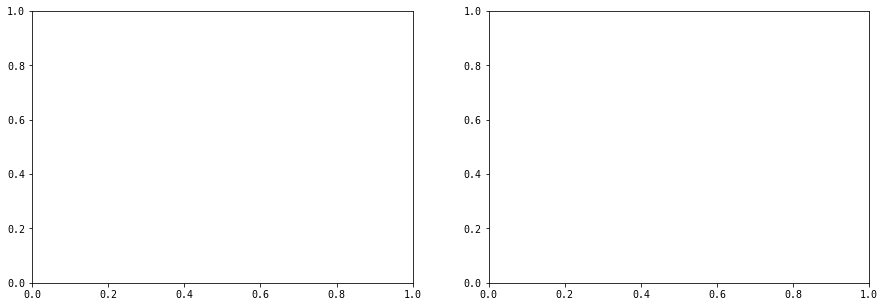

In [251]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
#compare happiness in 2016 to wealth


plt.subplot(1, 2, 2)
#compare happiness in 2017 to wealth



### Axes and Artists

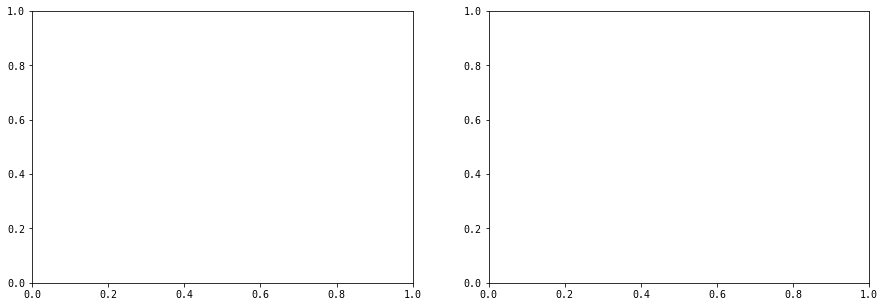

In [252]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))


In [253]:
len(ax)

2

In [256]:
ax[0]

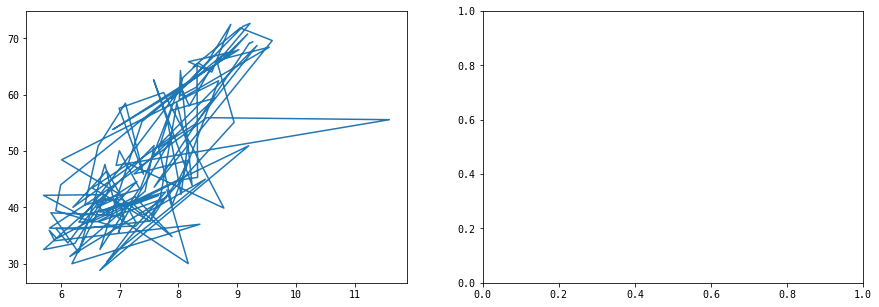

In [257]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
ax[0].plot(x, y)

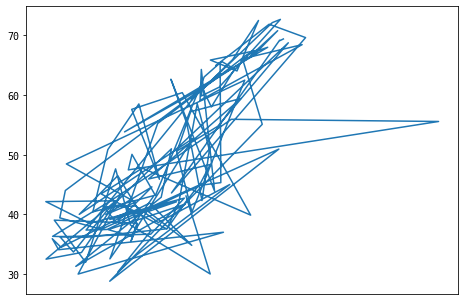

In [274]:
fig2 = plt.figure()
#left, bottom, width, height
ax = fig2.add_axes([0, 1, 1, 1])
#add plot to axis
ax.plot(x, y)
ax.set_xticks([]);

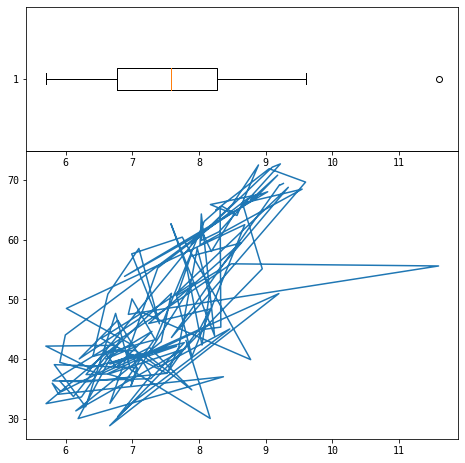

In [271]:
fig3 = plt.figure()
#left, bottom, width, height
ax1 = fig3.add_axes([0, 1, 1, 1])
#add plot to axis
ax1.plot(x, y)
#make another axis
ax2 = fig3.add_axes([0, 2, 1, 0.5])
ax2.boxplot(x, vert = False);